In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import numpy as np
from matplotlib import pyplot as plt
from pydrake.all import (
    RandomGenerator,
    StartMeshcat,
)


import sponana.utils
import sponana.sim

In [3]:
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7001


Press Space to log system info


INFO:sponana.planner.navigator:Generating path from [ 3.    7.   -1.57] to [ 1.          4.         -3.13316598]


Press Escape to stop the simulation


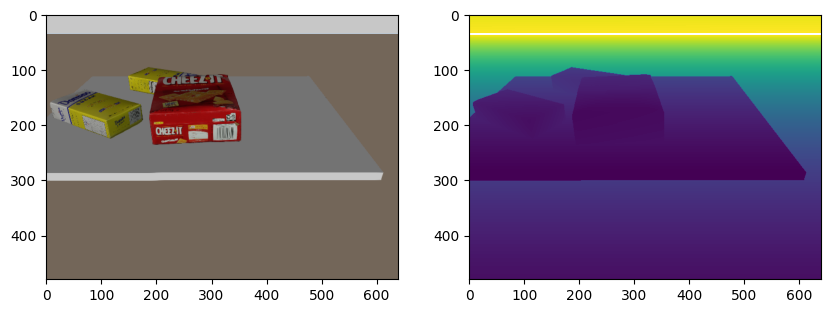

INFO:sponana.planner.navigator:Generating path from [ 1.08211103  4.04551957 -3.14398584] to [-0.69670947  3.15240161  0.8578673 ]
INFO:sponana.planner.navigator:Generating path from [ 1.09688477  4.05358912 -3.15205853] to [-0.60371995  4.85234302 -0.96395409]


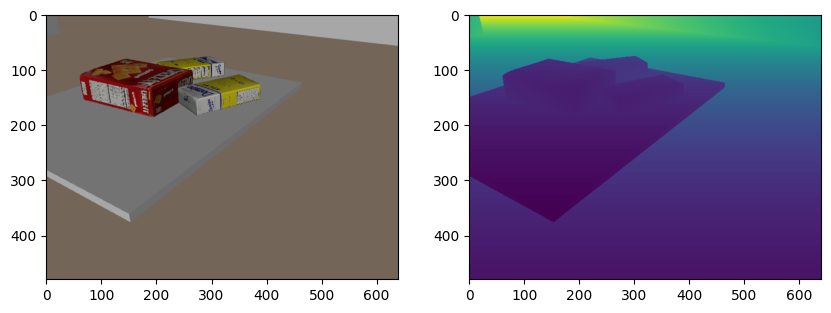

INFO:sponana.planner.navigator:Generating path from [-0.73534965  4.88218327 -0.99200062] to [ 1.00000000e+00  1.82786728e-12 -3.13316598e+00]
INFO:sponana.planner.navigator:Generating path from [-0.75878732  4.88773892 -1.00349066] to [-0.69670947 -0.84759839  0.8578673 ]


In [19]:
rng = np.random.default_rng(145)  # this is for python
generator = RandomGenerator(rng.integers(0, 1000))  # this is for c++

logging.root.setLevel(logging.INFO)
# logging.root.setLevel(logging.DEBUG)  # Uncomment to enable debug logging.

fsm_logger = logging.getLogger("sponana.fsm")
fsm_logger.setLevel(logging.INFO)

simulation_time = -1  # run indefinitely until ESC is pressed
# simulation_time = 1
add_debug_logger = True
add_fixed_cameras = False
use_teleop = False
plot_camera_input = True

simulator, diagram = sponana.sim.clutter_gen(
    meshcat,
    rng,
    add_debug_logger=add_debug_logger,
    simulation_time=simulation_time,
    add_fixed_cameras=add_fixed_cameras,
    use_teleop=use_teleop,
    plot_camera_input=plot_camera_input,
)

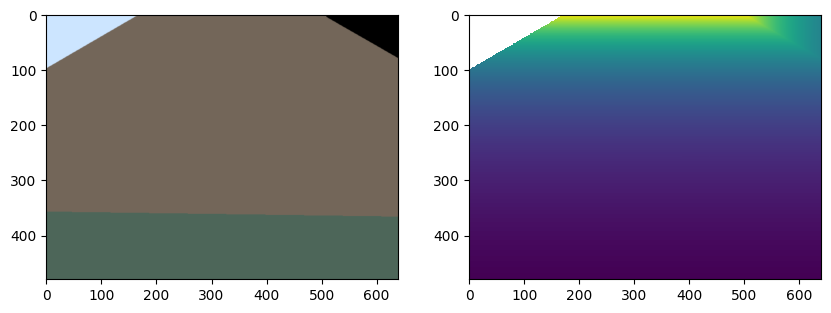

In [76]:
# Check the camera on Spot
context = simulator.get_mutable_context()
station = diagram.GetSubsystemByName("station")
context = station.GetMyContextFromRoot(context)
color_image = station.GetOutputPort("spot_camera.rgb_image").Eval(context)
depth_image = station.GetOutputPort("spot_camera.depth_image").Eval(context)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(color_image.data)
plt.subplot(1, 2, 2)
plt.imshow(depth_image.data)

In [78]:
# camera intrinsics
camera1 = station.GetSubsystemByName("rgbd_sensor_spot_camera")
camera_info = camera1.depth_camera_info()
print("intrinsics", camera_info.intrinsic_matrix())
print("focal length", camera_info.focal_x(), camera_info.focal_y())
print("field of view", camera_info.fov_x(), camera_info.fov_y())

intrinsics [[579.41125497   0.         319.5       ]
 [  0.         579.41125497 239.5       ]
 [  0.           0.           1.        ]]
focal length 579.4112549695427 579.4112549695427
field of view 1.009191289973297 0.7853981633974485


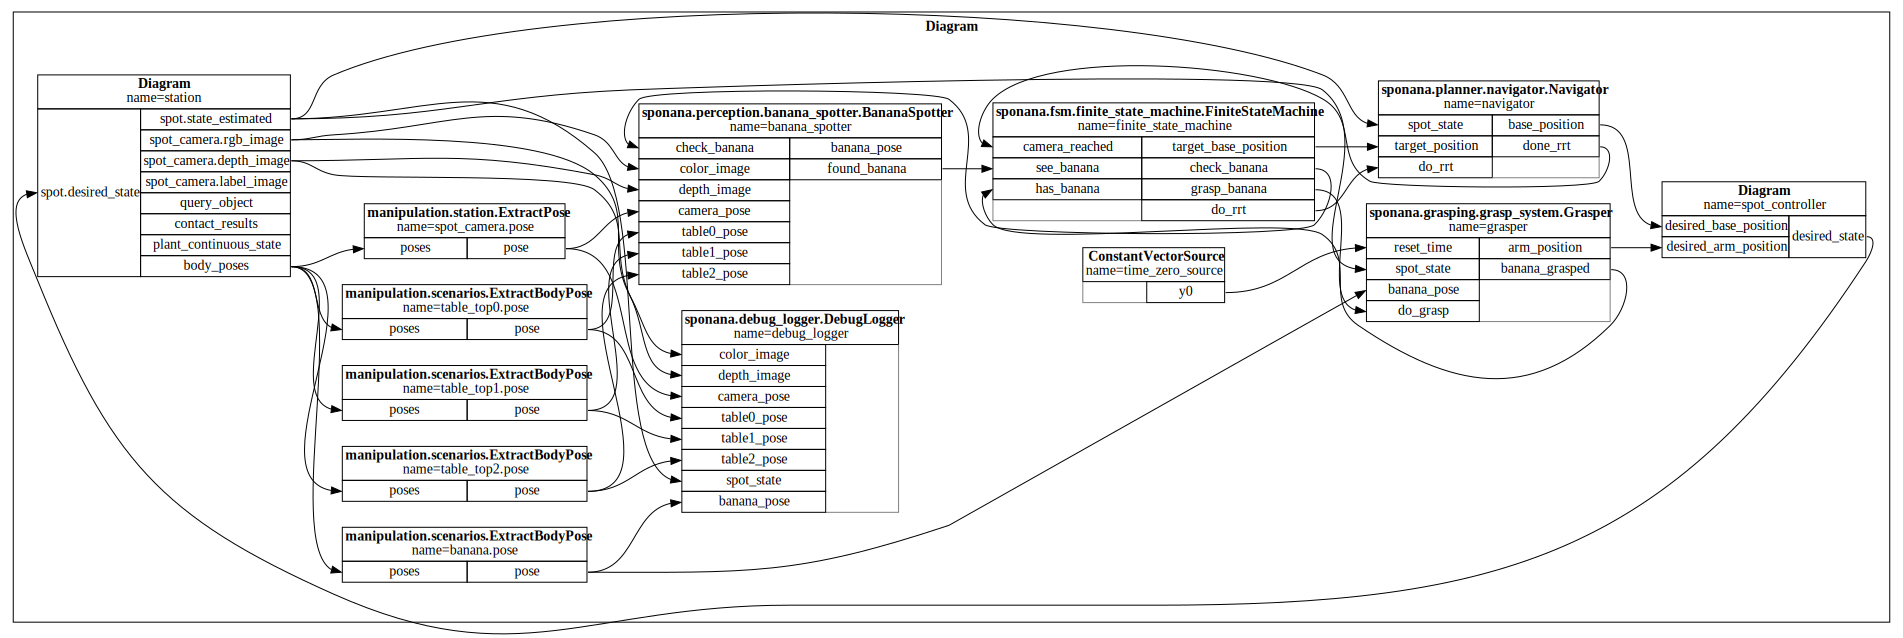

In [7]:
sponana.utils.visualize_diagram(diagram, max_depth=1)

In [71]:
from sponana.hardcoded_cameras import get_base_positions_for_hardcoded_cameras

get_base_positions_for_hardcoded_cameras()

array([[[ 1.00000000e+00,  4.00000000e+00, -3.13316598e+00],
        [-6.96709467e-01,  3.15240161e+00,  8.57867299e-01],
        [-6.03719954e-01,  4.85234302e+00, -9.63954086e-01]],

       [[ 1.00000000e+00,  1.82786728e-12, -3.13316598e+00],
        [-6.96709467e-01, -8.47598387e-01,  8.57867299e-01],
        [-6.03719954e-01,  8.52343020e-01, -9.63954086e-01]],

       [[ 1.00000000e+00, -4.00000000e+00, -3.13316598e+00],
        [-6.96709467e-01, -4.84759839e+00,  8.57867299e-01],
        [-6.03719954e-01, -3.14765698e+00, -9.63954086e-01]]])

In [72]:
get_base_positions_for_hardcoded_cameras().shape

(3, 3, 3)